# Research Questions:
1. What are the most reviewed Amazon products? : 
    >TOP 10 - VISUALIZATION  graph. 

2. What are the key topics covered by the reviews? (this would give the main keyword of the survey, which certainly will help the consumer to understand the summary of the discussion, and for the retailer, it will help to know the customer feedback in one or two words)

> LDA MODEL should answer this. (Work in Progress, Topic modelling visualization remaining.)

3. Analyze reviews in the first 90 days after a product launch? : 
(Work in Progess.)
TEXTBLOB/ TF-IDF (First 90days subset.)/CLASSIFY Positive and Ngeative comments for different time frame. 
> Extract reviews > sentiment analysis. 
> Filter out dataset using date, and do some kind of exploratory analysis for first 90days, their count and sentiment. 

4. Map the keywords in the review text against the review ratings to help train sentiment models.
> [Work in progress.]
> After categorizing into pos and neg, lets see if we can answer this question. 


# PPT

Intro - About out project and Dataset - Before balance and after balance,Sentiment mapping, Ratings Distribution - Sharmila
Data Preprocessing- Till stopwordsa removal] 

Exploratory Analysis - 
Question -1: - Prathyusha 
1. Word Cloud, Top 10 products, Total customer reviews for each product, Top 10 amzon product, top 10 customer reviews for products over time - 3 plots
2. Polarity plot and Cross tabulation plot

Question 2: Before90 and after90 compare - Haripriya
3 plots - review, avg ratings, avg polarity
T- test statistic - comparision for top 10 products

Question 3: LDA - Olivia
3 Plots - 3 products
Conclusion 



# To work 

Wordcloud - Olivia

Prathyusha - Stackedbar chart

Question with T test - Haripriya




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer

# from textblob import TextBlob
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
id                     28332 non-null object
dateAdded              28332 non-null object
dateUpdated            28332 non-null object
name                   28332 non-null object
asins                  28332 non-null object
brand                  28332 non-null object
categories             28332 non-null object
primaryCategories      28332 non-null object
imageURLs              28332 non-null object
keys                   28332 non-null object
manufacturer           28332 non-null object
manufacturerNumber     28332 non-null object
reviews.date           28332 non-null object
reviews.dateSeen       28332 non-null object
reviews.didPurchase    9 non-null object
reviews.doRecommend    16086 non-null object
reviews.id             41 non-null float64
reviews.numHelpful     16115 non-null float64
reviews.rating         28332 non-null int64
reviews.sourceURLs     28332 non-null obje

In [4]:
data2['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [5]:
# df1 = df[['dateAdded' , 'name' , 'primaryCategories' , 'reviews.date','reviews.doRecommend','reviews.rating','reviews.text','reviews.title']]
# df1.head()

# df = data2[['dateAdded','name','categories','primaryCategories','reviews.date','reviews.doRecommend','reviews.rating','reviews.text']]
# df.head()

df = data2[['dateAdded','name','reviews.date','reviews.rating','reviews.text']]
df.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text
0,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-02T00:00:00.000Z,3,I order 3 of them and one of the item is bad q...
1,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-08-31T00:00:00.000Z,4,Bulk is always the less expensive way to go fo...
2,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-06T00:00:00.000Z,5,Well they are not Duracell but for the price i...
3,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-03-28T00:00:00.000Z,5,Seem to work as well as name brand batteries a...
4,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-04-22T00:00:00.000Z,5,These batteries are very long lasting the pric...


# There are 5 different rating and below is the distribution of rating.

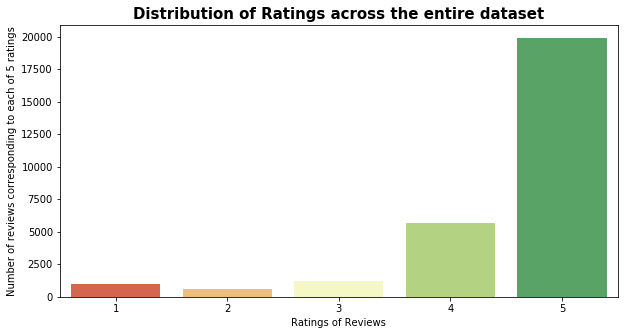

1      965
2      616
3     1206
4     5648
5    19897
Name: reviews.rating, dtype: int64


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df['reviews.rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(df['reviews.rating'].value_counts().sort_index());

# Balanced Dataset

In [7]:
df_1 = df[df["reviews.rating"]==1]
df_2 = df[df["reviews.rating"]==2]
df_3 = df[df["reviews.rating"]==3]
df_4 = df[df["reviews.rating"]==4].sample(n=1500)
df_5=df[df["reviews.rating"]==5].sample(n=1500)

In [8]:
balanced_df = pd.concat([df_1,df_2,df_3,df_4,df_5])

In [9]:
balanced_df["reviews.rating"].value_counts()

5    1500
4    1500
3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

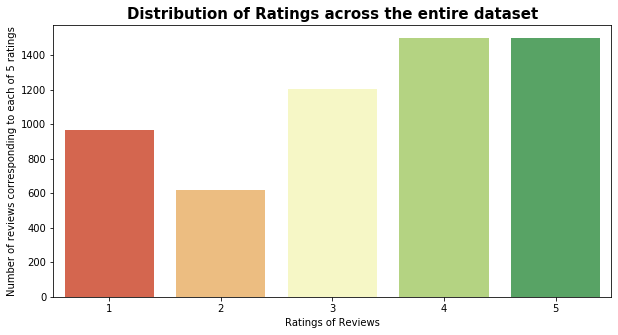

1     965
2     616
3    1206
4    1500
5    1500
Name: reviews.rating, dtype: int64


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(balanced_df['reviews.rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(balanced_df['reviews.rating'].value_counts().sort_index());

# Map Sentiment

In [11]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
balanced_df['sentiment']=balanced_df['reviews.rating'].map(sentiment)

In [12]:
balanced_df['sentiment'].value_counts()

1    3000
0    2787
Name: sentiment, dtype: int64

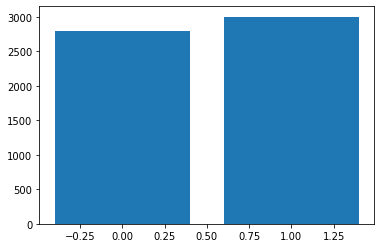

In [13]:
counts=balanced_df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [14]:
df1=balanced_df.copy()
df1.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text,sentiment
16,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-07T00:00:00.000Z,1,I don't know if I would buy thus brand again s...,0
24,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-05-21T00:00:00.000Z,1,These do not last long at all very cheap batte...,0
39,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-15T00:00:00.000Z,1,These batteries are horrible. We depend on AA ...,0
43,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-06-28T00:00:00.000Z,1,First time I bought these they worked well and...,0
45,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-11-23T00:00:00.000Z,1,These batteries don't last even in a simple di...,0


# Data Preprocessing

In [15]:
from sklearn.utils import shuffle
df1 = shuffle(df1)

In [16]:
df1["sentiment"].value_counts()

1    3000
0    2787
Name: sentiment, dtype: int64

In [17]:
df1.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text,sentiment
12565,2017-01-04T03:51:17Z,Amazon Tap Smart Assistant Alexaenabled (black...,2016-11-18T00:00:00.000Z,4,"I love this product and that you can take ""Ale...",1
14490,2017-01-11T06:58:33Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16T00:00:00.000Z,4,My grandkids love's it always on it great lear...,1
19571,2017-06-24T05:30:23Z,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2018-01-17T00:00:00.000Z,5,Loved this product. Easy to use and so many wa...,1
12113,2015-05-11T12:33:03Z,AmazonBasics Backpack for Laptops up to 17-inches,2013-11-21T06:00:00Z,3,"This bag does not fit my 17-inch laptop, altho...",0
8539,2015-12-03T01:23:41Z,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26T00:00:00.000Z,1,Wish I didn't buy these. Amazon does a lot of ...,0


In [18]:
df1.isnull().sum()

dateAdded         0
name              0
reviews.date      0
reviews.rating    0
reviews.text      0
sentiment         0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 12565 to 6727
Data columns (total 6 columns):
dateAdded         5787 non-null object
name              5787 non-null object
reviews.date      5787 non-null object
reviews.rating    5787 non-null int64
reviews.text      5787 non-null object
sentiment         5787 non-null int64
dtypes: int64(2), object(4)
memory usage: 316.5+ KB


In [20]:
df1["dateAdded"] = df1["dateAdded"].str[0:10]
df2=df1.rename(columns = {'dateAdded':'ProductLaunchDate'})
df2.head()

,ProductLaunchDate,name,reviews.date,reviews.rating,reviews.text,sentiment
12565,2017-01-04,Amazon Tap Smart Assistant Alexaenabled (black...,2016-11-18T00:00:00.000Z,4,"I love this product and that you can take ""Ale...",1
14490,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16T00:00:00.000Z,4,My grandkids love's it always on it great lear...,1
19571,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2018-01-17T00:00:00.000Z,5,Loved this product. Easy to use and so many wa...,1
12113,2015-05-11,AmazonBasics Backpack for Laptops up to 17-inches,2013-11-21T06:00:00Z,3,"This bag does not fit my 17-inch laptop, altho...",0
8539,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26T00:00:00.000Z,1,Wish I didn't buy these. Amazon does a lot of ...,0


In [21]:
df2["reviews.date"] = df2["reviews.date"].str[0:10]
df2=df2.rename(columns = {'reviews.date':'ReviewsPostedDate'})
df2.head()

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment
12565,2017-01-04,Amazon Tap Smart Assistant Alexaenabled (black...,2016-11-18,4,"I love this product and that you can take ""Ale...",1
14490,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16,4,My grandkids love's it always on it great lear...,1
19571,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2018-01-17,5,Loved this product. Easy to use and so many wa...,1
12113,2015-05-11,AmazonBasics Backpack for Laptops up to 17-inches,2013-11-21,3,"This bag does not fit my 17-inch laptop, altho...",0
8539,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26,1,Wish I didn't buy these. Amazon does a lot of ...,0


In [22]:
#remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

#remove words less than 4 
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

In [23]:
df2['reviews.text'] = df2['reviews.text'].apply(remove_punctuation)
df2['reviews.text'] = df2['reviews.text'].apply(remove_less_than)
df2['reviews.text'] = df2['reviews.text'].apply(remove_non_alphabet)
df2['reviews.text'] = df2['reviews.text'].apply(strip_all_entities)
df2['reviews.text'].head()

12565    love this product that take Alexa everywhere w...
14490           grandkids loves always great learning tool
19571    Loved this product Easy many ways niece down l...
12113    This does laptop although mine little bigger t...
8539     Wish didnt these Amazon does things well batte...
Name: reviews.text, dtype: object

In [24]:
df2['reviews.text']

12565    love this product that take Alexa everywhere w...
14490           grandkids loves always great learning tool
19571    Loved this product Easy many ways niece down l...
12113    This does laptop although mine little bigger t...
8539     Wish didnt these Amazon does things well batte...
                               ...                        
11502    Second purchase amazon battery product just di...
7874     Great price batteries needed them maintain bat...
22925    returning replacement quite working childs dev...
4707     keep purchasing them over overSeem last longer...
6727                   they good described power easy used
Name: reviews.text, Length: 5787, dtype: object

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]
# common_words = get_top_n_words(df2['reviews.text'], 20)
# for word, freq in common_words:
#     print(word, freq)
# uni_bef = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
# uni_bef.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


In [25]:
stop_words=stopwords.words('english')
def clean_text(text):
    words=word_tokenize(text)
    # lower case text, remove stop words, punctuations, check if alphabet
    text = [word.lower() for word in words if word not in stop_words and word not in string.punctuation and word.isalpha()]    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
def remove_stopwords(text):
    clean_text=' '.join([word.lower() for word in text.split() if word not in stop_words])
    return clean_text

In [26]:
df2['reviews.text'] = df2['reviews.text'].apply(remove_stopwords)
df2['reviews.text'].head()

12565    love product take alexa everywhere portable sp...
14490           grandkids loves always great learning tool
19571    loved product easy many ways niece loaded movi...
12113    this laptop although mine little bigger many w...
8539     wish didnt amazon things well batteries much t...
Name: reviews.text, dtype: object

# Skip stemming for now

In [28]:
# def stem_tweet(text): 
#     stemmer = PorterStemmer()
#     stemmed_sentence = []
#     for word in word_tokenize(text):
#         if len(word)>2:
#             stemmed_sentence.append(stemmer.stem(word.lower()))          
#     return " ".join(stemmed_sentence)

In [29]:
# df2['reviews.text'] = df2['reviews.text'].apply(stem_tweet)
# df2['reviews.text'].head()

In [30]:
# df2.head()

# Start again

## WordCloud

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [32]:
words = pd.Series(' '.join(df2['reviews.text']).split())

In [33]:
# import sys
# print(sys.executable)
# !pip install wordcloud

Overall

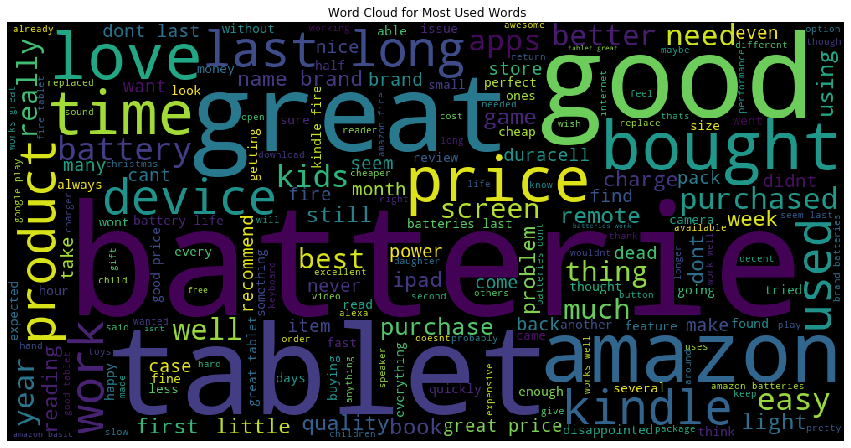

In [34]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title(" Word Cloud for Most Used Words")
plt.axis("off")
#plt.show()
plt.savefig('Amazon_Review_Word_Cloud2.jpg')

Positive Class

In [35]:
positiveWords=words = pd.Series(' '.join(df2[df2['sentiment']==1]['reviews.text']).split())

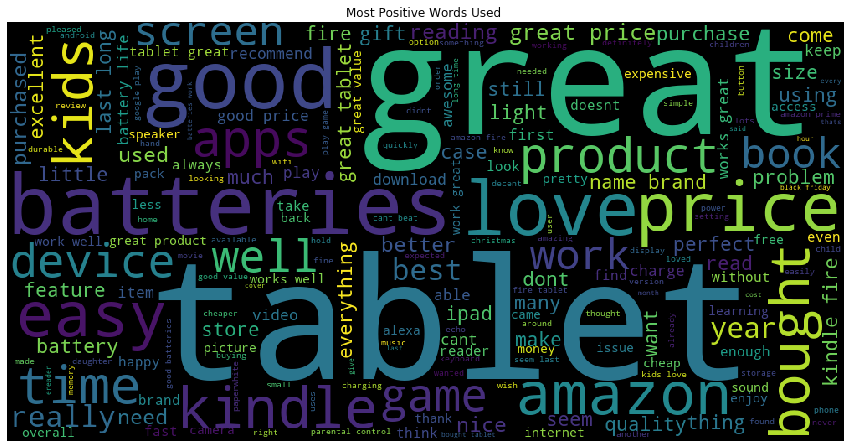

In [36]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Positive Words Used ")
plt.axis("off")
plt.show()

Negative Class

In [37]:
negativeWords=words = pd.Series(' '.join(df2[df2['sentiment']==0]['reviews.text']).split())

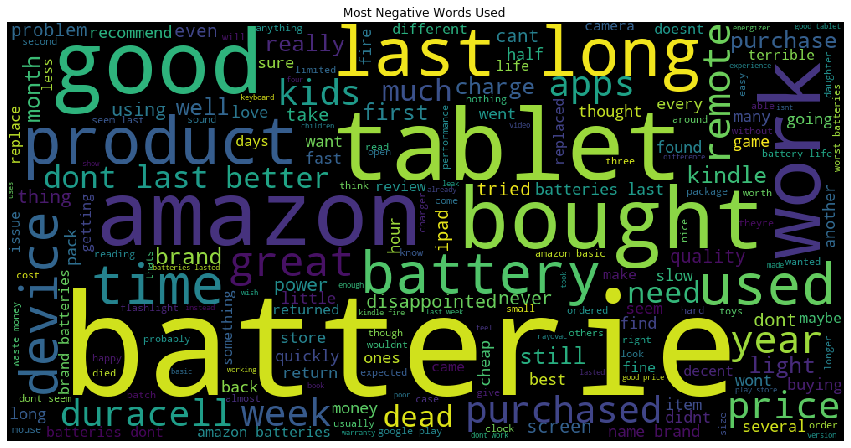

In [38]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Negative Words Used ")
plt.axis("off")
plt.show()

## Total customer reviews for each product

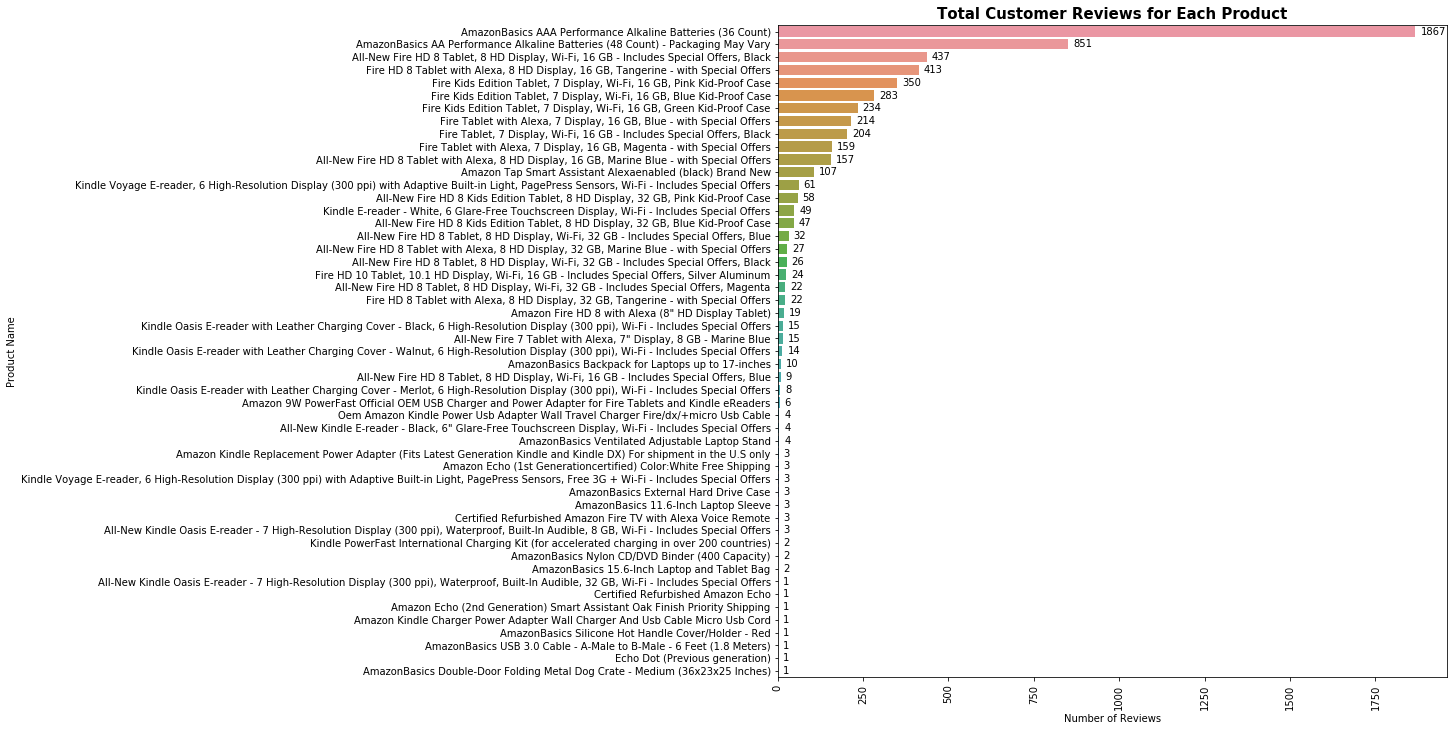

In [28]:
count_reviews=df2.groupby(['name'])['reviews.text'].count().reset_index()
count_reviews=count_reviews.rename(columns={'reviews.text': 'number_of_reviews'})
count_reviews=count_reviews.rename(columns={'name': 'product_name'})
count_reviews = count_reviews.sort_values(by="number_of_reviews",ascending=False)
plt.figure(figsize=(12,12))
plots=sns.barplot(x="number_of_reviews", y="product_name",
             data=count_reviews)
for p in plots.patches:
    plots.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.xticks(rotation='vertical')
plt.title("Total Customer Reviews for Each Product", fontweight='bold', fontsize=15)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()

## Top 10 Most reviewed Amazon Products

In [29]:
top_10=count_reviews.head(10)
top_10

,product_name,number_of_reviews
23,AmazonBasics AAA Performance Alkaline Batterie...,1867
22,AmazonBasics AA Performance Alkaline Batteries...,851
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",437
35,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",413
39,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",350
37,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",283
38,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",234
40,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",214
42,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",204
41,"Fire Tablet with Alexa, 7 Display, 16 GB, Mage...",159


## Total Customer Reviews for Each Top 10 Products Over Time

In [41]:
#Graph looks bit cluster, need to display only top 10.

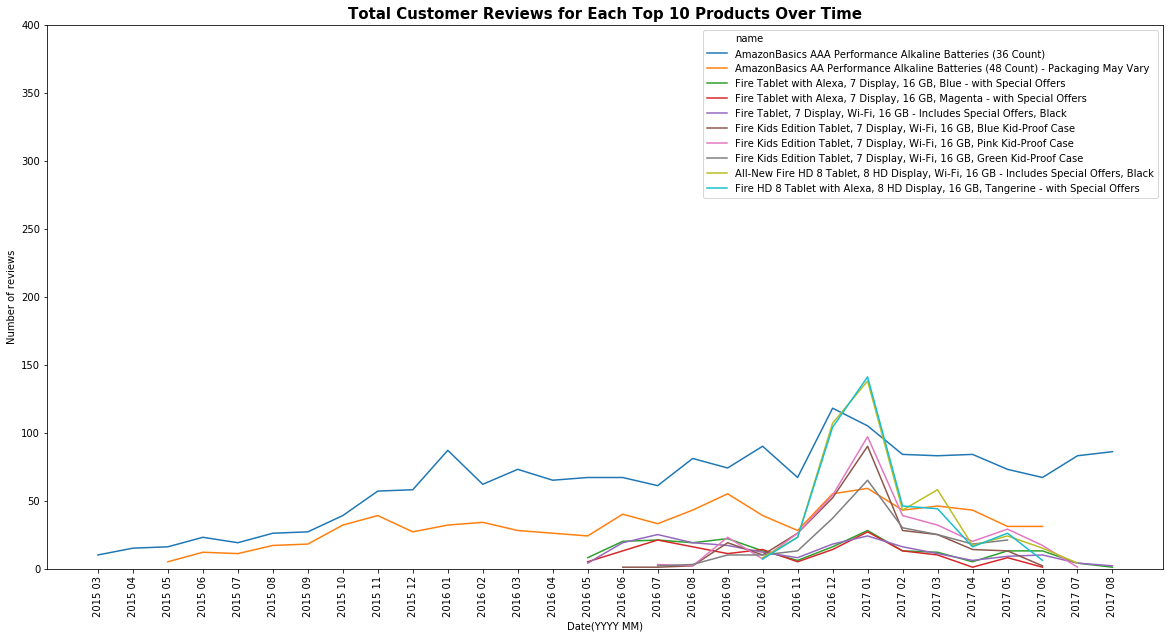

In [30]:
count_reviews_overtime=df2.groupby(['name','ReviewsPostedDate'])['reviews.text'].count().reset_index()
count_reviews_overtime['ReviewsPostedDate']= pd.to_datetime(count_reviews_overtime['ReviewsPostedDate'])
count_reviews_overtime['Month']=count_reviews_overtime['ReviewsPostedDate'].dt.strftime('%Y %m')
count_reviews_overtime_month=count_reviews_overtime.groupby(['name','Month'])['reviews.text'].sum().reset_index()

#extracting top 10 most reviewd amazon products
count_reviews_overtime_month=count_reviews_overtime_month[count_reviews_overtime_month['name'].isin(top_10['product_name'])]

count_reviews_overtime_month = count_reviews_overtime_month.sort_values(by="Month")

plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="reviews.text",
             hue="name",
             data=count_reviews_overtime_month,ci=None,style="name",dashes = False)
plt.ylim(0,400)
plt.xticks(rotation='vertical')
plt.title("Total Customer Reviews for Each Top 10 Products Over Time", fontweight='bold', fontsize=15)
plt.xlabel("Date(YYYY MM)")
plt.ylabel("Number of reviews")
plt.show()


In [31]:
# filtering only required column review.text
amazon_reviews_df=df2[['reviews.text']]

## Qn3 

In [32]:
df2.head()

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment
12565,2017-01-04,Amazon Tap Smart Assistant Alexaenabled (black...,2016-11-18,4,love product take alexa everywhere portable sp...,1
14490,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16,4,grandkids loves always great learning tool,1
19571,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2018-01-17,5,loved product easy many ways niece loaded movi...,1
12113,2015-05-11,AmazonBasics Backpack for Laptops up to 17-inches,2013-11-21,3,this laptop although mine little bigger many w...,0
8539,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26,1,wish didnt amazon things well batteries much t...,0


In [33]:
df3 = df2.copy()

In [34]:
from textblob import TextBlob
import statistics 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df3['TextBlob_Subjectivity'] = df3['reviews.text'].apply(getSubjectivity)
df3['TextBlob_Polarity'] = df3['reviews.text'].apply(getPolarity)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df3['TextBlob_Analysis'] = df3['TextBlob_Polarity'].apply(getAnalysis)
df3.head()
#df3[df3['name']=='Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum']

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
12565,2017-01-04,Amazon Tap Smart Assistant Alexaenabled (black...,2016-11-18,4,love product take alexa everywhere portable sp...,1,0.775000,0.425000,Positive
14490,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16,4,grandkids loves always great learning tool,1,0.750000,0.800000,Positive
19571,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2018-01-17,5,loved product easy many ways niece loaded movi...,1,0.606667,0.353333,Positive
12113,2015-05-11,AmazonBasics Backpack for Laptops up to 17-inches,2013-11-21,3,this laptop although mine little bigger many w...,0,0.465152,-0.071591,Negative
8539,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26,1,wish didnt amazon things well batteries much t...,0,0.150000,0.100000,Positive


In [35]:
pol_df=df3[df3.name.isin(top_10['product_name'])]
pol_df

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
14490,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-16,4,grandkids loves always great learning tool,1,0.750000,0.800000,Positive
8539,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-09-26,1,wish didnt amazon things well batteries much t...,0,0.150000,0.100000,Positive
26378,2017-03-06,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",2017-01-07,4,works good nice screen brightness resolution,1,0.800000,0.650000,Positive
9983,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2017-04-18,5,they work well name brand cheaper price,1,0.000000,0.000000,Neutral
11810,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2017-06-16,3,clicker months,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
11502,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2017-06-22,1,second purchase amazon battery product disappo...,0,0.307407,0.007407,Positive
7874,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-25,4,great price batteries needed maintain batteryp...,1,0.625000,0.608333,Positive
22925,2017-01-11,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",2017-01-06,3,returning replacement quite working childs dev...,0,0.500000,0.500000,Positive
4707,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-06-20,5,keep purchasing overseem last longer brand bat...,1,0.066667,0.000000,Neutral


In [36]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl_pos = pol_df.loc[pol_df['TextBlob_Polarity'] == 1].sample(5).values
for c in cl_pos:
    print(c[4])

5 random reviews with the highest positive sentiment polarity: 

this best childs tablet adults like benefit warranty matched case
this best purchase tablet daughter loves
best batteries need
best price come across
batteries arrived time prime batteries packaged well shipping storage work perfect remotes kids toys


In [37]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl_neu = pol_df.loc[pol_df['TextBlob_Polarity'] == 0].sample(5).values
for c in cl_neu:
    print(c[4])

5 random reviews with the most neutral sentiment(zero) polarity: 

gave gift recipient powered ipad giving away
brought cannot would recommend product
mistake oldbut enjoys
products delivered could find anywhere
dont suite purpose


In [38]:
print('5 reviews with the most negative polarity: \n')
# cl = df.loc[df.polarity == -0.97500000000000009, ['Review Text']].sample(2).values
cl_neg = pol_df.loc[pol_df['TextBlob_Polarity'] < 0].sample(5).values
for c in cl_neg:
    print(c[4])

5 reviews with the most negative polarity: 

these worst batteries ever amazon stop selling they last couple weeks clock everyone used send back
only slightly cheaper namebrand less half capacity
they fail earlier brand names assumed amazon would match beat others wont order
love amazon amazon products butmajor disappointment while much less cost duracell energizer amazon brand batteries ripoff only lasted third time devices used competitors batteries beforebummer
sorry amazon love batteries terrible they dont last long reordered realized peter short order they failed every application requiring batteries unfortunately made indonesia wasnt putting china slot immediately choice applications referred tooth brush remote controls motion lights purchased difference performance enjoyed idea stocked quantity quantity doesnt replace quality wont ordering batteries shopping superior productjmac


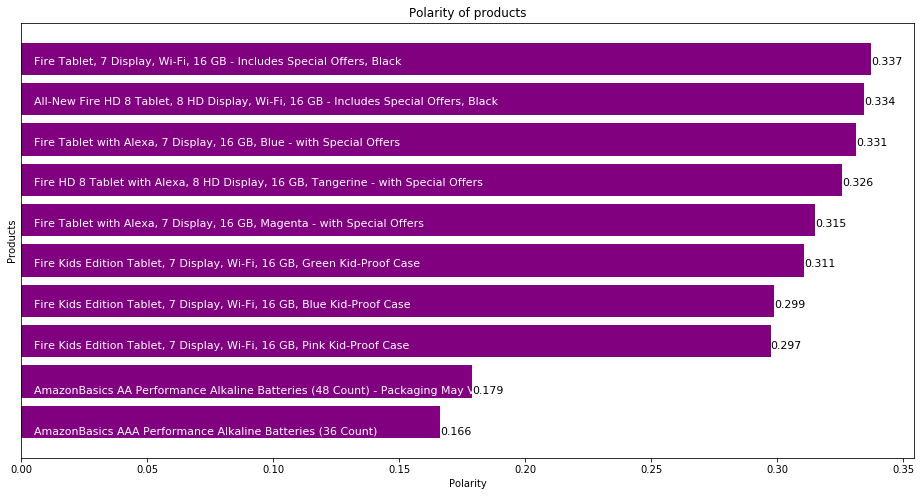

In [39]:
polarity_sorted=pd.DataFrame(pol_df.groupby('name')['TextBlob_Polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of products')
polarity_graph=plt.barh(np.arange(len(polarity_sorted.index)),polarity_sorted['TextBlob_Polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,polarity_sorted['TextBlob_Polarity']):
  plt.text(bar.get_width()+0.00001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Sentiments of each product')

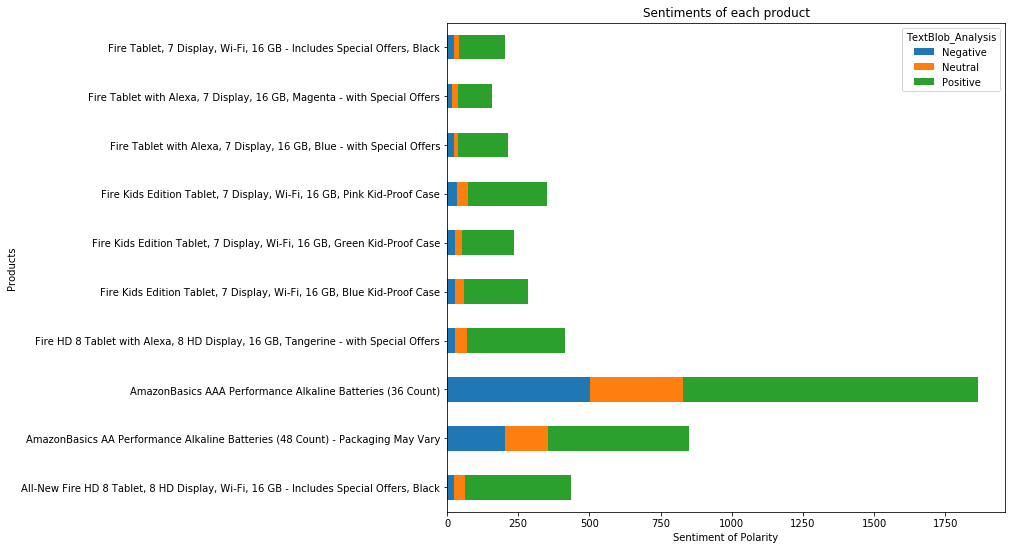

In [40]:
# Bar plot of cross tabulation between 
ct = pd.crosstab(pol_df['name'],pol_df['TextBlob_Analysis'])
ct.plot.barh(figsize=(10,9), align='center',stacked = True)
plt.xlabel('Sentiment of Polarity')
plt.ylabel('Products')
plt.title('Sentiments of each product')

In [41]:
ct

TextBlob_Analysis,Negative,Neutral,Positive
name,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",25,39,373
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,203,152,496
AmazonBasics AAA Performance Alkaline Batteries (36 Count),501,329,1037
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",28,42,343
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",29,29,225
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",28,24,182
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",36,37,277
"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",23,17,174
"Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers",17,20,122


# Remove

In [54]:
# from plotly.offline import init_notebook_mode, iplot
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# df4 = pd.DataFrame(pol_df)
# df4['TextBlob_Polarity'].iplot(
#     kind='hist',
#     bins=50,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
#     title='Sentiment Polarity Distribution')

In [55]:
# pol_df['reviews.rating'].iplot(
#     kind='hist',
#     xTitle='rating',
#     linecolor='black',
#     yTitle='count',
#     title='Review Rating Distribution')

In [56]:
# df4.groupby('name').count()['sentiment'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
#                                                            title='No of reviews for each product', xTitle='Class Name')

In [42]:
from datetime import datetime as DateTime, timedelta as TimeDelta
from datetime import date, timedelta
from datetime import datetime
from datetime import timedelta

In [43]:
count_reviews_overtime_new=df3.groupby(['name','ReviewsPostedDate'])['reviews.text'].count().reset_index()
count_reviews_overtime_new['ReviewsPostedDate']= pd.to_datetime(count_reviews_overtime['ReviewsPostedDate'])
count_reviews_overtime_new

,name,ReviewsPostedDate,reviews.text
0,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-07-22,1
1,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-08-16,1
2,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-09-22,1
3,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-12-01,2
4,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-12-02,2
...,...,...,...
2887,"Kindle Voyage E-reader, 6 High-Resolution Disp...",2017-12-21,1
2888,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2013-10-10,1
2889,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2013-12-25,1
2890,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2014-06-27,1


In [44]:
count_reviews=df3.groupby(['name','ProductLaunchDate'])['reviews.text'].count()
count_prodLaunchDate = pd.DataFrame(count_reviews)
print(count_prodLaunchDate)
print(len(count_prodLaunchDate))
count_reviews1=df3.groupby(['name'])['reviews.text'].count()
count_prod1 = pd.DataFrame(count_reviews1)
print(count_prod1)
print(len(count_prod1))

                                                                      reviews.text
name                                               ProductLaunchDate              
All-New Fire 7 Tablet with Alexa, 7" Display, 8... 2017-06-24                   15
All-New Fire HD 8 Kids Edition Tablet, 8 HD Dis... 2017-05-20                   47
All-New Fire HD 8 Kids Edition Tablet, 8 HD Dis... 2017-05-20                   58
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ... 2017-06-24                  157
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ... 2017-06-22                   27
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-03                  437
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                    9
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   26
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   32
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   22
All-

In [45]:
product_names_df = df3['name'].unique() #List of Unique Products
len(product_names_df)

51

In [46]:
print(product_names_df)

['Amazon Tap Smart Assistant Alexaenabled (black) Brand New'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case'
 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers'
 'AmazonBasics Backpack for Laptops up to 17-inches'
 'AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary'
 'Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers'
 'AmazonBasics AAA Performance Alkaline Batteries (36 Count)'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case'
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Free 3G + Wi-Fi - Includes Special Offers'
 'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers'
 'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers'
 'All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case'
 'Fire Kids Edition Tablet, 7

In [47]:
df3[df3['name']=='Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum']

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
19173,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-06-23,3,love capabilities offerdownside totally shuts ...,0,0.675000,0.250000,Positive
19161,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2016-12-18,4,love kindle although drop always insurance bes...,1,0.577778,0.644444,Positive
19256,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-05-12,1,over past years purchased kindle fires various...,0,0.469444,-0.202778,Negative
19246,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-01-23,5,biggest best kindle light feather today,1,0.500000,0.700000,Positive
19180,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-01-25,5,bought tablet wife uses every usefulto uses pl...,1,1.000000,1.000000,Positive
19199,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2016-11-17,5,entertainment works great best option dont wan...,1,0.416667,0.666667,Positive
19193,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-08-04,4,this great tablet money thing would like longe...,1,0.875000,0.900000,Positive
19236,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-05-27,3,kindle fire replace laptop died pleased findin...,0,1.000000,0.650000,Positive
19176,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-02-04,5,love tablet reading upgrade kindle searching i...,1,0.550000,0.250000,Positive
19240,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-06-03,3,dont care close window separately would prefer...,0,0.625000,0.500000,Positive


# Average rating, polarity and reviews count of each product

In [48]:
import math
from statistics import *
reviews=[]
for i in product_names_df:
    total = count_reviews_overtime_new[count_reviews_overtime_new['name']== i]
    total_new = df3[df3['name']== i]

    # To get first review date
    first_day_review =total['ReviewsPostedDate'].min()
    #To get last review date
    last_day_review =total['ReviewsPostedDate'].max()
    
# ******************
#For Product Launch Date

#     Begindatestring = first_day_review
#     Begindate = datetime.strptime(Begindatestring, "%Y-%m-%d")
#     #To get 90th day date
#     day90 = Begindate + timedelta(days=90)
    
#     last_date = last_day_review
#     last_day = datetime.strptime(last_date, "%Y-%m-%d")
#     EndDate = last_day+timedelta(days=1)
    
#         # to datetime object
#     Begindate = Begindate.strftime("%Y-%m-%d")
#     day90 = day90.strftime("%Y-%m-%d")
#     enddate = EndDate.strftime("%Y-%m-%d")

#***********************
    
    
    Begindate = first_day_review
    #To get 90th day date
    day90 = Begindate + timedelta(days=90)
    
    last_day_review = last_day_review+timedelta(days=1)
    
    # to datetime object
    Begindate = Begindate.strftime("%Y-%m-%d")
    day90 = day90.strftime("%Y-%m-%d")
    enddate = last_day_review.strftime("%Y-%m-%d")
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    

   
    reviews_dates_within_90_days = []
    reviews_dates_within_90_days = total[total['ReviewsPostedDate'].between(Begindate,day90, inclusive=True)]

    reviews_dates_after_90_days = []
    reviews_dates_after_90_days = total[total['ReviewsPostedDate'].between(day90,enddate, inclusive=False)]
    
    ratings_dates_within_90_days = []
    ratings_dates_within_90_days = total_new[total_new['ReviewsPostedDate'].between(Begindate,day90, inclusive=True)]

    ratings_dates_after_90_days = []
    ratings_dates_after_90_days = total_new[total_new['ReviewsPostedDate'].between(day90,enddate, inclusive=False)]

    reviews_first_90_days = reviews_dates_within_90_days['reviews.text'].sum()
    reviews_later_days =  reviews_dates_after_90_days['reviews.text'].sum()
    
    avg_rating_first_90_days = ratings_dates_within_90_days['reviews.rating'].mean()
    avg_rating_later_days =  ratings_dates_after_90_days['reviews.rating'].mean()
    
    avg_rating_first_90_days = round(avg_rating_first_90_days,1)
    avg_rating_later_days = round(avg_rating_later_days,1)
    
    ratings_dates_within_90_days['TextBlob_Polarity_before90'] = ratings_dates_within_90_days['reviews.text'].apply(getPolarity)
    ratings_dates_after_90_days['TextBlob_Polarity_after90'] = ratings_dates_after_90_days['reviews.text'].apply(getPolarity)
    
    Avgpolatirybefore90 = ratings_dates_within_90_days['TextBlob_Polarity_before90'].mean()
    Avgpolarityafter90 = ratings_dates_after_90_days['TextBlob_Polarity_after90'].mean()

    
    reviews.append([i,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avgpolatirybefore90,Avgpolarityafter90])


reviews_df = pd.DataFrame(reviews, columns=["Product_Name", "reviews_first_90_days","reviews_later_days","avg_rating_first_90_days","avg_rating_later_days","Avg_polarity_before90","Avg_polarity_after90"])
reviews_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90
0,Amazon Tap Smart Assistant Alexaenabled (black...,11,96,3.4,3.5,0.316155,0.336705
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",24,326,3.6,3.6,0.248063,0.300943
2,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",26,131,3.9,3.8,0.268749,0.350742
3,AmazonBasics Backpack for Laptops up to 17-inches,3,7,3.3,3.4,0.131569,0.151550
4,AmazonBasics AA Performance Alkaline Batteries...,29,822,3.9,3.0,0.268909,0.175768
5,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",184,229,3.8,3.8,0.311665,0.336805
6,AmazonBasics AAA Performance Alkaline Batterie...,49,1818,3.3,2.9,0.207187,0.165036
7,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",14,220,3.4,3.6,0.266770,0.313428
8,"Kindle Voyage E-reader, 6 High-Resolution Disp...",1,2,5.0,4.5,0.366667,0.216667
9,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",55,159,3.6,3.8,0.317854,0.335788


In [49]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'  

reviews_df['TextBlob_Analysis_before90'] = reviews_df['Avg_polarity_before90'].apply(getAnalysis)
reviews_df['TextBlob_Analysis_after90'] = reviews_df['Avg_polarity_after90'].apply(getAnalysis)
reviews_df.head()
reviews_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90
0,Amazon Tap Smart Assistant Alexaenabled (black...,11,96,3.4,3.5,0.316155,0.336705,Positive,Positive
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",24,326,3.6,3.6,0.248063,0.300943,Positive,Positive
2,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",26,131,3.9,3.8,0.268749,0.350742,Positive,Positive
3,AmazonBasics Backpack for Laptops up to 17-inches,3,7,3.3,3.4,0.131569,0.151550,Positive,Positive
4,AmazonBasics AA Performance Alkaline Batteries...,29,822,3.9,3.0,0.268909,0.175768,Positive,Positive
5,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",184,229,3.8,3.8,0.311665,0.336805,Positive,Positive
6,AmazonBasics AAA Performance Alkaline Batterie...,49,1818,3.3,2.9,0.207187,0.165036,Positive,Positive
7,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",14,220,3.4,3.6,0.266770,0.313428,Positive,Positive
8,"Kindle Voyage E-reader, 6 High-Resolution Disp...",1,2,5.0,4.5,0.366667,0.216667,Positive,Positive
9,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",55,159,3.6,3.8,0.317854,0.335788,Positive,Positive


In [55]:
Vis_df = reviews_df.copy()
Total_reviews = Vis_df["reviews_first_90_days"] + reviews_df["reviews_later_days"]
Vis_df["Total_Reviews"] = Total_reviews
Vis_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90,Total_Reviews
0,Amazon Tap Smart Assistant Alexaenabled (black...,11,96,3.4,3.5,0.316155,0.336705,Positive,Positive,107
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",24,326,3.6,3.6,0.248063,0.300943,Positive,Positive,350
2,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",26,131,3.9,3.8,0.268749,0.350742,Positive,Positive,157
3,AmazonBasics Backpack for Laptops up to 17-inches,3,7,3.3,3.4,0.131569,0.151550,Positive,Positive,10
4,AmazonBasics AA Performance Alkaline Batteries...,29,822,3.9,3.0,0.268909,0.175768,Positive,Positive,851
5,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",184,229,3.8,3.8,0.311665,0.336805,Positive,Positive,413
6,AmazonBasics AAA Performance Alkaline Batterie...,49,1818,3.3,2.9,0.207187,0.165036,Positive,Positive,1867
7,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",14,220,3.4,3.6,0.266770,0.313428,Positive,Positive,234
8,"Kindle Voyage E-reader, 6 High-Resolution Disp...",1,2,5.0,4.5,0.366667,0.216667,Positive,Positive,3
9,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",55,159,3.6,3.8,0.317854,0.335788,Positive,Positive,214


In [84]:
AvgFinalVis_df=Vis_df[Vis_df.Product_Name.isin(top_10['product_name'])]
AvgFinalVis_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90,Total_Reviews
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",24,326,3.6,3.6,0.248063,0.300943,Positive,Positive,350
4,AmazonBasics AA Performance Alkaline Batteries...,29,822,3.9,3.0,0.268909,0.175768,Positive,Positive,851
5,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",184,229,3.8,3.8,0.311665,0.336805,Positive,Positive,413
6,AmazonBasics AAA Performance Alkaline Batterie...,49,1818,3.3,2.9,0.207187,0.165036,Positive,Positive,1867
7,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",14,220,3.4,3.6,0.266770,0.313428,Positive,Positive,234
9,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",55,159,3.6,3.8,0.317854,0.335788,Positive,Positive,214
10,"Fire Tablet with Alexa, 7 Display, 16 GB, Mage...",40,119,3.9,3.7,0.341577,0.305915,Positive,Positive,159
12,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",6,277,3.5,3.6,0.253045,0.299864,Positive,Positive,283
13,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",142,295,3.8,3.8,0.349099,0.327195,Positive,Positive,437
17,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",54,150,3.6,3.6,0.329246,0.340310,Positive,Positive,204


### T - test

In [57]:
AvgFinalVis_df[['avg_rating_first_90_days','avg_rating_later_days']].describe()


,avg_rating_first_90_days,avg_rating_later_days
count,10.000000,10.000000
mean,3.640000,3.540000
std,0.206559,0.323866
min,3.300000,2.900000
25%,3.525000,3.600000
50%,3.600000,3.600000
75%,3.800000,3.775000
max,3.900000,3.800000


In [65]:
AvgFinalVis_df.index = ['0','1','2','3','4','5','6','7','8','9']
AvgFinalVis_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90,Total_Reviews
0,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",24,326,3.6,3.6,0.248063,0.300943,Positive,Positive,350
1,AmazonBasics AA Performance Alkaline Batteries...,29,822,3.9,3.0,0.268909,0.175768,Positive,Positive,851
2,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",184,229,3.8,3.8,0.311665,0.336805,Positive,Positive,413
3,AmazonBasics AAA Performance Alkaline Batterie...,49,1818,3.3,2.9,0.207187,0.165036,Positive,Positive,1867
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",14,220,3.4,3.6,0.266770,0.313428,Positive,Positive,234
5,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",55,159,3.6,3.8,0.317854,0.335788,Positive,Positive,214
6,"Fire Tablet with Alexa, 7 Display, 16 GB, Mage...",40,119,3.9,3.7,0.341577,0.305915,Positive,Positive,159
7,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",6,277,3.5,3.6,0.253045,0.299864,Positive,Positive,283
8,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",142,295,3.8,3.8,0.349099,0.327195,Positive,Positive,437
9,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",54,150,3.6,3.6,0.329246,0.340310,Positive,Positive,204


In [79]:
#try manually
from statistics import *
from math import sqrt
from scipy.stats import norm
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t


def dependent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = mean(AvgFinalVis_df.avg_rating_first_90_days), mean(AvgFinalVis_df.avg_rating_later_days)
    # number of paired samples
    n = len(AvgFinalVis_df.avg_rating_first_90_days)
    # sum squared difference between observations
    d1 = sum([(AvgFinalVis_df.avg_rating_first_90_days[i]-AvgFinalVis_df.avg_rating_later_days[i])**2 for i in range(n)])
    # sum difference between observations
    d2 = sum([(AvgFinalVis_df.avg_rating_first_90_days[i]-AvgFinalVis_df.avg_rating_later_days[i]) for i in range(n)])
    # standard deviation of the difference between means
    sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
    # standard error of the difference between the means
    sed = sd / sqrt(n)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, df, cv, p

In [80]:
data1 = AvgFinalVis_df.avg_rating_first_90_days
data2 = AvgFinalVis_df.avg_rating_later_days
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print("Interpretation via critical value:")
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
print("Interpretation via p-value:")
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=0.949, df=9, cv=1.833, p=0.368
Interpretation via critical value:
Accept null hypothesis that the means are equal.
Interpretation via p-value:
Accept null hypothesis that the means are equal.


In [85]:
# using Vis_df - has 50 prods and AvgFinalVis_df - 50 prods
from scipy import stats
import scipy.stats as sp

print(sp.stats.ttest_rel(AvgFinalVis_df.dropna()['avg_rating_first_90_days'], AvgFinalVis_df.dropna()['avg_rating_later_days']))
sp.stats.ttest_rel(Vis_df.dropna()['avg_rating_first_90_days'],Vis_df.dropna()['avg_rating_later_days'])

Ttest_relResult(statistic=0.9486832980505133, pvalue=0.3675580619329293)


Ttest_relResult(statistic=0.49972591996885823, pvalue=0.6200060122950396)

### Does the average rating after 90 days increase compared to the first 90 days?

Ho: μ(after90)=μ(before 90)


HA: μ(after90)!=μ(before90)

interpretation: Thus both top10 and 50 t test suggest that "accept null hyp" -  avg rating before 90 and after 90 days are equal

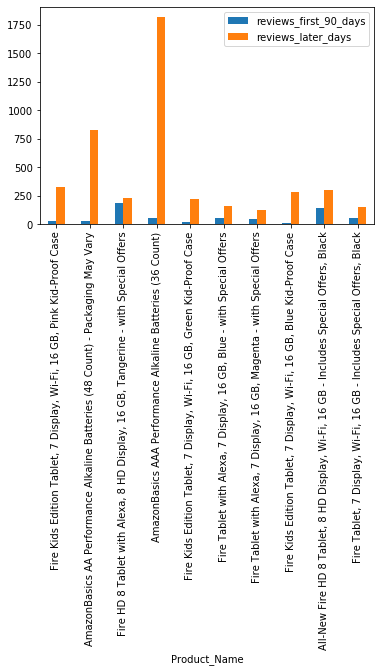

In [52]:
AvgFinalVis_df.plot(x="Product_Name", y=["reviews_first_90_days", "reviews_later_days"], kind="bar")

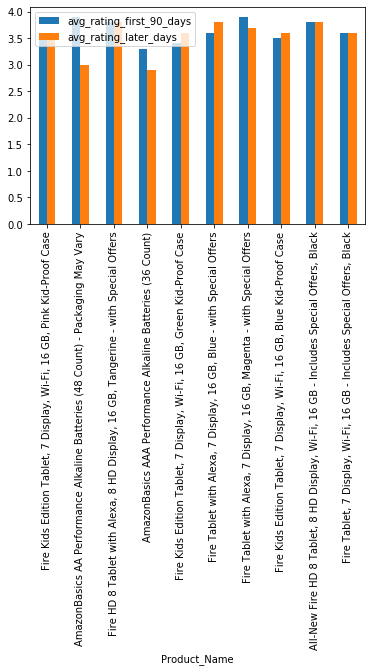

In [53]:
AvgFinalVis_df.plot(x="Product_Name", y=["avg_rating_first_90_days", "avg_rating_later_days"], kind="bar")

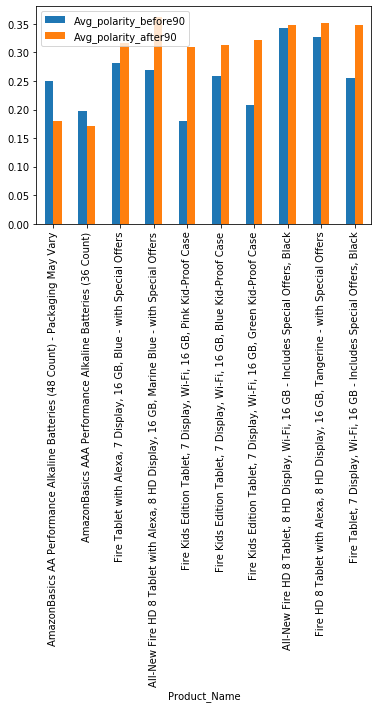

In [69]:
AvgFinalVis_df.plot(x="Product_Name", y=["Avg_polarity_before90", "Avg_polarity_after90"], kind="bar")

# Q2 - Topic Modelling

In [157]:
import nltk
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def clean(doc,most_common):
    lowercase = [i.lower() for i in nltk.word_tokenize(doc) if i.lower()
                not in most_common]
    normalized=[stemmer.stem(i) for i in lowercase]
    return normalized

In [158]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [159]:
import math
import nltk
from gensim import corpora
import gensim
from statistics import *
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def dominant_topic(ProductName):
    print(ProductName+"\n")
    total = df2[df2['name']== ProductName]
    review_df = total['reviews.text']
    
    reviews_list = review_df.values.tolist()

    filtered_sample=[]
    for each_review in review_df:
        words=word_tokenize(each_review)
        for w in words:
            filtered_sample.append(w)
    fdist=nltk.FreqDist(filtered_sample)
    most_common=[i for i,j in fdist.most_common(10)]
    reviews_clean = [clean(i,most_common) for i in reviews_list]
    dictionary = corpora.Dictionary(reviews_clean)
    for each_word in dictionary:
        dictonary_words = each_word,dictionary[each_word]
    
    doc_term_matrix = [dictionary.doc2bow(reviews_list) for reviews_list in reviews_clean]
    
    Lda = gensim.models.ldamodel.LdaModel

    # Running and Training LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary)
    
    for i,topic in ldamodel.show_topics(formatted=True, num_topics=5, num_words=10):
        print(str(i)+": "+ topic)
        #print()
    
    topics = [ldamodel[doc_term_matrix[i]] for i in range(len(reviews_list))]
    
    document_topic = \
    pd.concat([topics_document_to_dataframe(topics_document, num_topics=5) for topics_document in topics]) \
      .reset_index(drop=True).fillna(0)
    
    sns.set(rc={'figure.figsize':(10,5)})
    plt.xlabel("List of Topics")
    plt.ylabel("Total Reviews for product")
    plt.suptitle("Topics Distribution for Product.")
    document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')   
    return ldamodel

In [160]:
#document_topic

# Dominant topic for top 3 products

In [161]:
top_3 = top_10.head(3).reset_index()
top_3_names = top_3['product_name']
top_3_names

0    AmazonBasics AAA Performance Alkaline Batterie...
1    AmazonBasics AA Performance Alkaline Batteries...
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
Name: product_name, dtype: object

In [173]:
#dominant_topic(top_3_names[0])

In [174]:
#dominant_topic(top_3_names[1])

In [175]:
#dominant_topic(top_3_names[2])

In [184]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def word_cloud_topic(ProductName):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

    topics = v.show_topics(formatted=False)

    fig, axes = plt.subplots(1, 5, figsize=(10,5), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.suptitle("Word Cloud of Topic Distribution for each Product.")
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig('Topic_Modelling_Word_Cloud.jpg')
    plt.show()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)

0: 0.025*"brand" + 0.019*"time" + 0.017*"these" + 0.015*"use" + 0.011*"product" + 0.011*"name" + 0.011*"they" + 0.010*"last" + 0.010*"week" + 0.009*"packag"
1: 0.016*"seem" + 0.016*"last" + 0.016*"they" + 0.016*"use" + 0.014*"these" + 0.013*"well" + 0.010*"like" + 0.010*"work" + 0.009*"duracel" + 0.009*"pack"
2: 0.027*"brand" + 0.017*"name" + 0.012*"use" + 0.012*"remot" + 0.012*"life" + 0.010*"purchas" + 0.009*"well" + 0.009*"order" + 0.008*"valu" + 0.007*"money"
3: 0.016*"work" + 0.015*"these" + 0.015*"remot" + 0.014*"they" + 0.012*"purchas" + 0.011*"use" + 0.009*"charg" + 0.008*"product" + 0.008*"day" + 0.008*"expect"
4: 0.019*"duracel" + 0.016*"they" + 0.014*"brand" + 0.012*"time" + 0.012*"like" + 0.012*"use" + 0.010*"energ" + 0.009*"these" + 0.009*"month" + 0.009*"seem"


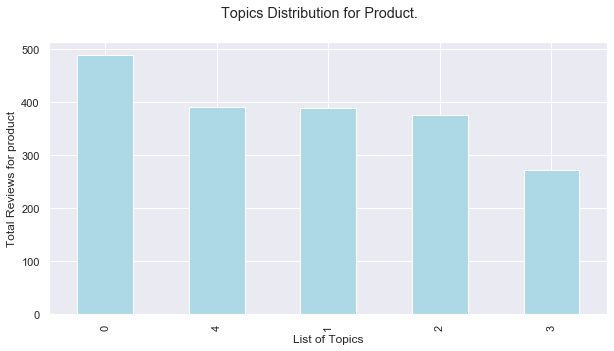

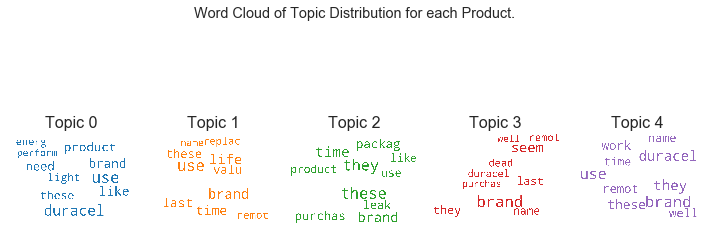

In [185]:
#Print Word Cloud for each Product - Topics.

Product1 = word_cloud_topic(dominant_topic(top_3_names[0]))

AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary

0: 0.029*"work" + 0.018*"duracel" + 0.015*"use" + 0.013*"well" + 0.012*"light" + 0.011*"they" + 0.010*"brand" + 0.010*"purchas" + 0.009*"week" + 0.009*"order"
1: 0.022*"brand" + 0.016*"work" + 0.014*"seem" + 0.012*"like" + 0.010*"week" + 0.009*"they" + 0.009*"name" + 0.008*"last" + 0.007*"realli" + 0.007*"need"
2: 0.013*"brand" + 0.012*"time" + 0.012*"like" + 0.010*"would" + 0.010*"remot" + 0.010*"quickli" + 0.009*"name" + 0.009*"need" + 0.009*"last" + 0.008*"day"
3: 0.019*"brand" + 0.018*"use" + 0.012*"purchas" + 0.011*"duracel" + 0.010*"last" + 0.010*"energ" + 0.010*"product" + 0.009*"seem" + 0.009*"qualiti" + 0.009*"they"
4: 0.035*"work" + 0.014*"they" + 0.011*"time" + 0.009*"devic" + 0.009*"duracel" + 0.009*"remot" + 0.008*"camera" + 0.007*"product" + 0.007*"bought" + 0.006*"didnt"


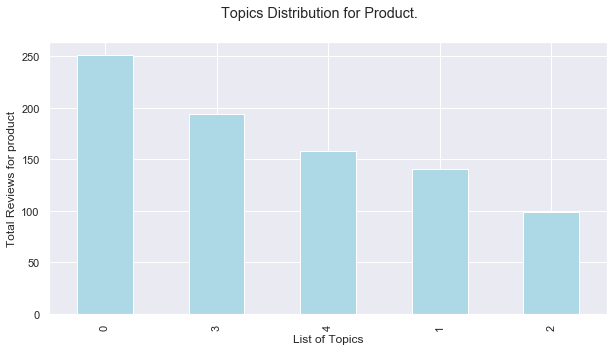

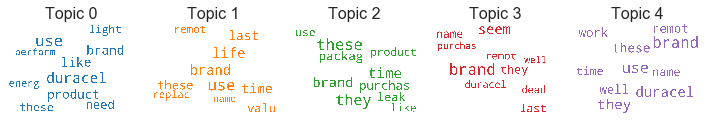

In [179]:
#Print Word Cloud for each Product - Topics.

Product2 = word_cloud_topic(dominant_topic(top_3_names[1]))

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black

0: 0.015*"read" + 0.014*"like" + 0.014*"play" + 0.012*"book" + 0.011*"game" + 0.011*"screen" + 0.010*"easi" + 0.009*"work" + 0.009*"look" + 0.009*"would"
1: 0.013*"devic" + 0.012*"love" + 0.011*"want" + 0.011*"screen" + 0.010*"read" + 0.009*"time" + 0.009*"use" + 0.009*"product" + 0.009*"ipad" + 0.008*"work"
2: 0.011*"love" + 0.010*"easi" + 0.008*"game" + 0.008*"nice" + 0.008*"like" + 0.007*"time" + 0.007*"would" + 0.007*"back" + 0.007*"avail" + 0.007*"tablet"
3: 0.019*"work" + 0.012*"would" + 0.010*"ipad" + 0.010*"recommend" + 0.010*"use" + 0.008*"need" + 0.008*"easi" + 0.008*"read" + 0.008*"like" + 0.007*"purchas"
4: 0.014*"like" + 0.012*"work" + 0.010*"love" + 0.010*"ipad" + 0.009*"would" + 0.009*"screen" + 0.008*"game" + 0.008*"purchas" + 0.008*"kid" + 0.008*"happi"


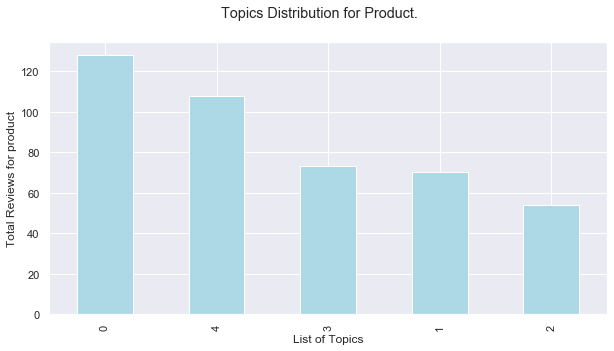

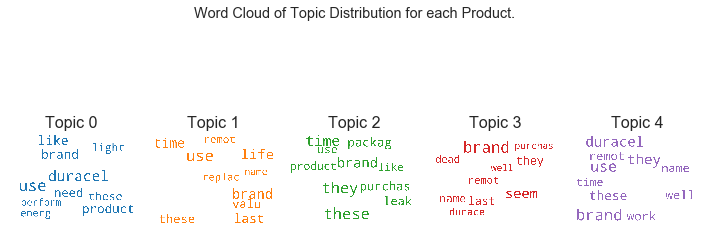

In [186]:
#Print Word Cloud for each Product - Topics.
wc_3 = dominant_topic(top_3_names[2])
Product3 = word_cloud_topic(wc_3)